### Cvičení z Matstat pro FSV- část 2., Václav Kalous

In [1]:
set.seed(379)

In [2]:
cer = read.csv("cereal.csv",header = TRUE, sep = ";", stringsAsFactors = FALSE)

Pro toto cvičení si jako proměnné zvolím obsah cukrů a sacharidů v cereáliích.

##### Konfidenční elipsoid

In [3]:
b = cer[2:nrow(cer),9:10]

In [4]:
m = matrix(NA, nrow = nrow(b), ncol = ncol(b))

In [5]:
for (i in 1:nrow(b)){
    
    m[i,] = as.numeric(b[i,])
    
}

In [6]:
bivCI = function(s, xbar, n, alpha, m){ #funkce z učebnice
    
    x = sin(2 * pi * (0 : (m - 1)) / (m - 1)) 
    
    y = cos(2 * pi * (0 : (m - 1)) / (m - 1)) 
    
    cv = qchisq(1 - alpha, 2)
    
    cv = cv / n
    
    for (i in 1 : m){
        
        pair = c(x[i], y[i])
        
        q = pair %*% solve(s,pair) 
        
        x[i] = x[i] * sqrt(cv / q) + xbar[1]
        
        y[i] = y[i] * sqrt(cv / q) + xbar[2]
        
        
        
    }
    
    cbind(x, y)
}

In [7]:
mns = c(mean(m[,1]),mean(m[,2]))

Nyní vytvořím scatterplot a v něm 99%, 95% a 90% konfidenční elipsoidy.

In [8]:
options(warn = -1)

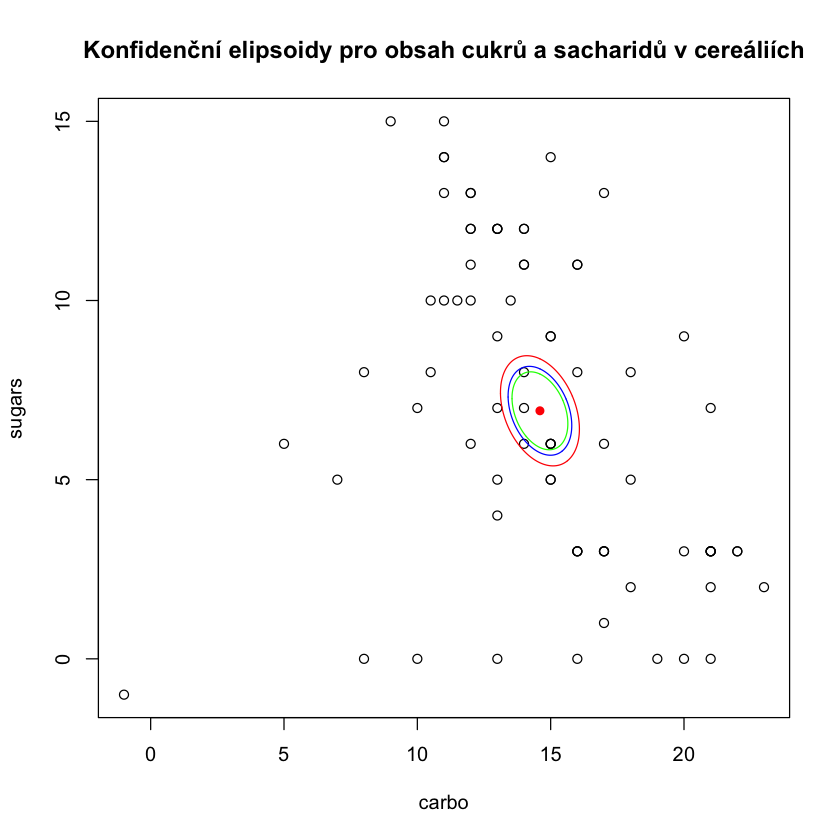

In [9]:
plot(b, main = "Konfidenční elipsoidy pro obsah cukrů a sacharidů v cereáliích")
points(mns[1],mns[2], col = "red", pch = 16)

lines(bivCI(s = var(b), xbar = mns, n = dim(b)[1], alpha = 0.01, m = 500), type = "l", col = "red")
lines(bivCI(s = var(b), xbar = mns, n = dim(b)[1], alpha = 0.05, m = 500), type = "l", col = "blue")
lines(bivCI(s = var(b), xbar = mns, n = dim(b)[1], alpha = 0.1, m = 500), type = "l", col = "green")

Vidíme, že elipsoidy jsou centrovány bodu, jehož souřadnice jsou dány průměry zkoumaných veličin.

In [10]:
m1 = mean(m[,1])
m2 = mean(m[,2])
s1 = sd(m[,1])
s2 = sd(m[,2])
n = nrow(m)

Spočtěme nyní jednorozměrný CI pro sacharidy:

In [11]:
e1 = qnorm(0.99)*s1/sqrt(n)
l1 = m1 - e1
r1 = m1 + e1
ci1 = c(l1,r1)
ci1

[1] 13.46300 15.73181

A pro cukry:

In [12]:
e2 = qnorm(0.975)*s2/sqrt(n)
l2 = m2 - e2
r2 = m2 + e2
ci2 = c(l2,r2)
ci2

[1] 5.929274 7.914881

##### Test shody vektorů středních hodnot

In [13]:
install.packages("ICSNP")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [14]:
library(ICSNP)

Loading required package: mvtnorm
Loading required package: ICS


In [15]:
install.packages(pkgs="http://www.karlin.mff.cuni.cz/~hlavka/sms2/SMSdata_1.0.tar.gz", repos=NULL, type="source")

In [16]:
library(SMSdata)

In [17]:
data(carc)

In [20]:
d = carc

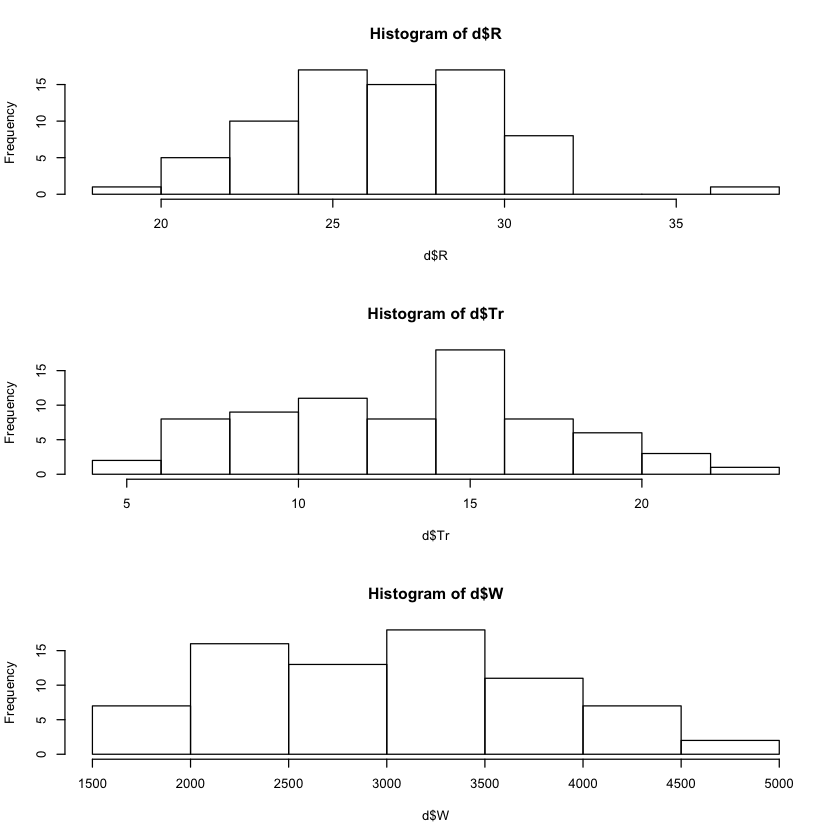

In [52]:
par(mfrow = c(3,1))
hist(d$R)
hist(d$Tr)
hist(d$W)

Tyto proměnné vypadají jako přibližně normálně rozdělené, provedu na nich tedy Hottelingův test.

In [57]:
h = d[,6:8]

In [63]:
nrow(h)

[1] 74

In [65]:
h1 = h[1:37,]
h2 = h[38:74,]

In [69]:
HotellingsT2(h1,h2)


	Hotelling's two sample T2-test

data:  h1 and h2
T.2 = 0.96342, df1 = 3, df2 = 70, p-value = 0.415
alternative hypothesis: true location difference is not equal to c(0,0,0)


Na základě výsledku testu nezamítáme H0, a závěrem je, že vektory středních hodnot se shodují.

In [70]:
colMeans(h1)

R         Tr          W 
  26.83784   13.45946 3082.43243

In [71]:
colMeans(h2)

R         Tr          W 
  26.79730   14.02703 2939.18919